# Technical Assessment

## Center for Applied Data Science

### Question 1:- Construct a SQL database to store the source data, showing the complete build process in your notebook.
#### Creating SQL Database and Loading the data into it

As per the intructions i'm using Sqlite3 to create and store a database and store in all the data. 
    "For Creating a Database, i will be using Sqlite3 library within python, where i will create the database and inject the data in tables directly from csv's

##### Importing the libraries

In [1]:
import sqlite3, csv

###### Creating the Database using .connect() function. The database is called cads2 and is stored in the Current Directory

In [2]:
conn= sqlite3.connect('cads2.db')  #if no database is found, it creates a new database with cads name
c= conn.cursor() #creating a cursor for our database

##### Now It's time to create tables within our Database and inject data to them

First i created the District table, Since the datatypes were not given in the data dictionary i assumed them myself|||| Setting A1 as Primary Key
### District Table

In [3]:
'''c.execute("""CREATE TABLE district ( 
            A1 INTEGER PRIMARY KEY,A2 TEXT, A3 TEXT, A4 INTEGER, A5 INTEGER, A6 INTEGER, A7 INTEGER, A8 INTEGER,
                    A9 INTEGER, A10 REAL, A11 INTEGER, A12 REAL, A13 REAL, A14 INTEGER, A15 INTEGER, A16 INTEGER); """)'''

'c.execute("""CREATE TABLE district ( \n            A1 INTEGER PRIMARY KEY,A2 TEXT, A3 TEXT, A4 INTEGER, A5 INTEGER, A6 INTEGER, A7 INTEGER, A8 INTEGER,\n                    A9 INTEGER, A10 REAL, A11 INTEGER, A12 REAL, A13 REAL, A14 INTEGER, A15 INTEGER, A16 INTEGER); """)'

In [4]:
with open('district.csv','r') as fin: # Reading  Csv 
        # Here the first line is taken as Headers, and since the csv's provided by cads had delimeter as semicolon, i set it as parameter\n",
        dr = csv.DictReader(fin, delimiter= ';') # comma is default delimiter, so i set it to semicolon
        to_db = [(i['A1'], i['A2'],i['A3'],i['A4'],i['A5'],i['A6'],i['A7'],i['A8'],i['A9'],i['A10'],i['A11'],i['A12'],i['A13'],i['A14'],i['A15'],i['A16']) for i in dr]

Once the Data has been read from CSV, I used Execute many command to insert the row into the table

In [5]:
#c.executemany("INSERT INTO district (A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16) VALUES (?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?);", to_db)

As a sannity check lets see whether the data was injected correctly to the table

In [6]:
#c.execute("DROP TABLE IF EXISTS district")

In [7]:
c.execute('SELECT A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16 FROM district LIMIT 10')
Data = c.fetchall()

In [8]:
# Determine the longest width for each column\n",
header = ("A1", "A2", "A3", "A4", "A5", "A6", "A7", "A8", "A9", "A10", "A11", "A12", "A13", "A14", "A15", "A16")
widths = [len(cell) for cell in header]
for row in Data:
    for i, cell in enumerate(row):
       widths[i] = max(len(str(cell)), widths[i])
#Construct formatted row like before
formatted_row = ' '.join('{:%d}' % width for width in widths)
print(formatted_row.format(*header))
for row in Data:
    print(formatted_row.format(*row))

A1 A2             A3              A4      A5 A6 A7 A8 A9 A10   A11   A12  A13  A14 A15   A16  
 1 Hl.m. Praha    Prague          1204953  0  0  0  1  1 100.0 12541 0.29 0.43 167 85677 99107
 2 Benesov        central Bohemia   88884 80 26  6  2  5  46.7  8507 1.67 1.85 132  2159  2674
 3 Beroun         central Bohemia   75232 55 26  4  1  5  41.7  8980 1.95 2.21 111  2824  2813
 4 Kladno         central Bohemia  149893 63 29  6  2  6  67.4  9753 4.64 5.05 109  5244  5892
 5 Kolin          central Bohemia   95616 65 30  4  1  6  51.4  9307 3.85 4.43 118  2616  3040
 6 Kutna Hora     central Bohemia   77963 60 23  4  2  4  51.5  8546 2.95 4.02 126  2640  3120
 7 Melnik         central Bohemia   94725 38 28  1  3  6  63.4  9920 2.26 2.87 130  4289  4846
 8 Mlada Boleslav central Bohemia  112065 95 19  7  1  8  69.4 11277 1.25 1.44 127  5179  4987
 9 Nymburk        central Bohemia   81344 61 23  4  2  6  55.3  8899 3.39 3.97 149  2987  2487
10 Praha - vychod central Bohemia   92084 55 29  4

In [9]:
conn.commit()

#### Now that i have created the first table.. it's time to follow through for all other csv files and tables

### Accounts Table

Creating the Accounts Table and injecting the data to it from the accounts CSV

In [10]:
#c.execute("""CREATE TABLE account (account_id INTEGER PRIMARY KEY, district_id INTEGER,frequency TEXT, date TEXT, FOREIGN KEY(district_id) REFERENCES district(A1)); """)

SQLITE3 does not have support for datetime formatting, so for now i am simply loading it above as TEXT format

In [11]:
#c.execute("DROP TABLE IF EXISTS account")

In [12]:
'''with open('account.csv','r') as finn:  
    dr1 = csv.DictReader(finn, delimiter = ';') # i made some changes in csv to delimiter is comma.. if you run it change it to semicolon
    to_db2 = [(i['account_id'], i['district_id'],i['frequency'],i['date']) for i in dr1]'''

"with open('account.csv','r') as finn:  \n    dr1 = csv.DictReader(finn, delimiter = ';') # i made some changes in csv to delimiter is comma.. if you run it change it to semicolon\n    to_db2 = [(i['account_id'], i['district_id'],i['frequency'],i['date']) for i in dr1]"

In [13]:
#c.executemany("INSERT INTO account (account_id,district_id,frequency,date) VALUES (?,?,?,?);", to_db2)

##### For Sanity Check priniting out the data to see if it has been injected properly we print out the first 10 rows

In [14]:
c.execute('SELECT account_id,district_id,frequency,date TEXT FROM account LIMIT 10')
Acc = c.fetchall()

In [15]:
# Determine the longest width for each column\n",
header2 = ("account_id", "district_id", "frequency", "date")
widths2 = [len(cell) for cell in header2]
for row in Acc:
    for i, cell in enumerate(row):
        widths2[i] = max(len(str(cell)), widths2[i])
#Construct formatted row like before
formatted_row = ' '.join('{:%d}' % width for width in widths2)
print(formatted_row.format(*header2))
for row in Acc:
    print(formatted_row.format(*row))

account_id district_id frequency        date  
         1          18 POPLATEK MESICNE 950324
         2           1 POPLATEK MESICNE 930226
         3           5 POPLATEK MESICNE 970707
         4          12 POPLATEK MESICNE 960221
         5          15 POPLATEK MESICNE 970530
         6          51 POPLATEK MESICNE 940927
         7          60 POPLATEK MESICNE 961124
         8          57 POPLATEK MESICNE 950921
         9          70 POPLATEK MESICNE 930127
        10          54 POPLATEK MESICNE 960828


##### Creating The Client Table and Injecting data from client.csv

### Client Table

In [16]:
'''c.execute("""CREATE TABLE client (
                    client_id INTEGER PRIMARY KEY,birth_number INTEGER, district_id INTEGER, FOREIGN KEY(district_id) REFERENCES district(A1) ); """)'''

'c.execute("""CREATE TABLE client (\n                    client_id INTEGER PRIMARY KEY,birth_number INTEGER, district_id INTEGER, FOREIGN KEY(district_id) REFERENCES district(A1) ); """)'

In [17]:
#c.execute("DROP TABLE IF EXISTS client")

In [18]:
'''with open('client.csv','r') as cli:
# Here the first line is taken as Headers, and since the csv's provided by cads had delimeter as semicolon, i set it as parameter
    dr2 = csv.DictReader(cli, delimiter= ';') # comma is default delimiter, so i set it to semicolon\n",
    to_db3 = [(i['client_id'], i['birth_number'],i['district_id']) for i in dr2]'''

'with open(\'client.csv\',\'r\') as cli:\n# Here the first line is taken as Headers, and since the csv\'s provided by cads had delimeter as semicolon, i set it as parameter\n    dr2 = csv.DictReader(cli, delimiter= \';\') # comma is default delimiter, so i set it to semicolon\n",\n    to_db3 = [(i[\'client_id\'], i[\'birth_number\'],i[\'district_id\']) for i in dr2]'

In [19]:
#c.executemany("INSERT INTO client (client_id,birth_number,district_id) VALUES (?,?,?);", to_db3)

##### For Sanity check, lets print out the Client table to see if it has been injected correctly

In [20]:
c.execute('SELECT * FROM client LIMIT 10')
Cli = c.fetchall()
# Determine the longest width for each column
header3 = ("client_id", "birth_number", "district_id")
widths3 = [len(cell) for cell in header3]
for row in Cli:
    for i, cell in enumerate(row):
        widths3[i] = max(len(str(cell)), widths3[i])
#Construct formatted row like before
formatted_row = ' '.join('{:%d}' % width for width in widths3)
print(formatted_row.format(*header3))
for row in Cli:
    print(formatted_row.format(*row))

client_id birth_number district_id
        1       706213          18
        2       450204           1
        3       406009           1
        4       561201           5
        5       605703           5
        6       190922          12
        7       290125          15
        8       385221          51
        9       351016          60
       10       430501          57


Similarly Creating the transanction Table and injecting data from Csv

### Transaction Table

In [21]:
'''c.execute("""CREATE TABLE trans (
                trans_id INTEGER PRIMARY KEY,account_id INTEGER, 
                date TEXT, type TEXT,operation TEXT, amount REAL, balance REAL,
                k_symbol TEXT, bank TEXT, account INTEGER, FOREIGN KEY(account_id) REFERENCES account(account_id) ); """)'''

'c.execute("""CREATE TABLE trans (\n                trans_id INTEGER PRIMARY KEY,account_id INTEGER, \n                date TEXT, type TEXT,operation TEXT, amount REAL, balance REAL,\n                k_symbol TEXT, bank TEXT, account INTEGER, FOREIGN KEY(account_id) REFERENCES account(account_id) ); """)'

In [22]:
#c.execute("DROP TABLE IF EXISTS trans")

In [23]:
'''with open('trans.csv','r') as trs: 
    dr3 = csv.DictReader(trs, delimiter= ';') 
    to_db4 = [(i['trans_id'], i['account_id'],i['date'],i['type'],i['operation'],i['amount'],i['balance'],i['k_symbol'],i['bank'],i['account']) for i in dr3]'''

"with open('trans.csv','r') as trs: \n    dr3 = csv.DictReader(trs, delimiter= ';') \n    to_db4 = [(i['trans_id'], i['account_id'],i['date'],i['type'],i['operation'],i['amount'],i['balance'],i['k_symbol'],i['bank'],i['account']) for i in dr3]"

In [24]:
#c.executemany("INSERT INTO trans (trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account) VALUES (?,?,?,?,?,?,?,?,?,?);", to_db4)

##### For Sanity Check priniting out the data to see if it has been injected properly we print out first 20 rows

In [25]:
c.execute('SELECT * FROM trans LIMIT 10')
tr = c.fetchall()
# Determine the longest width for each column\n",
header4 = ("trans_id", "account_id", "date","type","operation","amount","balance","k_symbol","bank","account")
widths4 = [len(cell) for cell in header4]
for row in tr:
    for i, cell in enumerate(row):
        widths4[i] = max(len(str(cell)), widths4[i])
#Construct formatted row like before
formatted_row = ' '.join('{:%d}' % width for width in widths4)
print(formatted_row.format(*header4))
for row in tr:
    print(formatted_row.format(*row))

trans_id account_id date   type   operation     amount balance k_symbol bank account 
       1          1 950324 PRIJEM VKLAD         1000.0  1000.0                       
       5          1 950413 PRIJEM PREVOD Z UCTU 3679.0  4679.0          AB   41403269
       6          1 950513 PRIJEM PREVOD Z UCTU 3679.0 20977.2          AB   41403269
       7          1 950613 PRIJEM PREVOD Z UCTU 3679.0 26835.2          AB   41403269
       8          1 950713 PRIJEM PREVOD Z UCTU 3679.0 30414.8          AB   41403269
       9          1 950813 PRIJEM PREVOD Z UCTU 3679.0 28902.7          AB   41403269
      10          1 950913 PRIJEM PREVOD Z UCTU 3679.0 22714.3          AB   41403269
      11          1 951013 PRIJEM PREVOD Z UCTU 3679.0 23318.2          AB   41403269
      12          1 951113 PRIJEM PREVOD Z UCTU 3679.0 21721.1          AB   41403269
      13          1 951213 PRIJEM PREVOD Z UCTU 3679.0 20248.6          AB   41403269


### Loan Table

In [26]:
'''c.execute("""CREATE TABLE loan (
                loan_id INTEGER PRIMARY KEY,account_id INTEGER, 
                date TEXT, amount REAL, duration INTEGER,
                payments INTEGER,status TEXT, FOREIGN KEY(account_id) REFERENCES account(account_id) ); """)'''

'c.execute("""CREATE TABLE loan (\n                loan_id INTEGER PRIMARY KEY,account_id INTEGER, \n                date TEXT, amount REAL, duration INTEGER,\n                payments INTEGER,status TEXT, FOREIGN KEY(account_id) REFERENCES account(account_id) ); """)'

In [27]:
#c.execute("DROP TABLE IF EXISTS loan")

In [28]:
'''with open('loan.csv','r') as lo: 
    dr4 = csv.DictReader(lo, delimiter= ';') # i made some changes in csv to delimiter is comma.. if you run it change it to semicolon
    to_db5 = [(i['loan_id'], i['account_id'],i['date'],i['amount'],i['duration'],i['payments'],i['status']) for i in dr4]'''

"with open('loan.csv','r') as lo: \n    dr4 = csv.DictReader(lo, delimiter= ';') # i made some changes in csv to delimiter is comma.. if you run it change it to semicolon\n    to_db5 = [(i['loan_id'], i['account_id'],i['date'],i['amount'],i['duration'],i['payments'],i['status']) for i in dr4]"

Inserting Data into the Loan Table from the csv

In [29]:
#c.executemany("INSERT INTO loan (loan_id,account_id,date,amount,duration,payments,status) VALUES (?,?,?,?,?,?,?);", to_db5)

#### For Sanity Check priniting out the data to see if it has been injected properly we print out first 20 rows

In [30]:
c.execute('SELECT * FROM loan LIMIT 10')
loa = c.fetchall()
# Determine the longest width for each column\n",
header5 = ("loan_id", "account_id", "date","amount","duration","payments","status")
widths5 = [len(cell) for cell in header5]
for row in loa:
    for i, cell in enumerate(row):
        widths5[i] = max(len(str(cell)), widths5[i])
#Construct formatted row like before
formatted_row = ' '.join('{:%d}' % width for width in widths5)
print(formatted_row.format(*header5))
for row in loa:
    print(formatted_row.format(*row))

loan_id account_id date   amount   duration payments status
   4959          2 940105  80952.0       24     3373 A     
   4961         19 960429  30276.0       12     2523 B     
   4962         25 971208  30276.0       12     2523 A     
   4967         37 981014 318480.0       60     5308 D     
   4968         38 980419 110736.0       48     2307 C     
   4973         67 960502 165960.0       24     6915 A     
   4986         97 970810 102876.0       12     8573 A     
   4988        103 971206 265320.0       36     7370 D     
   4989        105 981205 352704.0       48     7348 C     
   4990        110 970908 162576.0       36     4516 C     


In [31]:
conn.commit()

### Orders Table

In [32]:
'''c.execute("""CREATE TABLE Orders (
                order_id INTEGER PRIMARY KEY,account_id INTEGER, 
                bank_to TEXT, account_to INTEGER, amount REAL,
                k_symbol TEXT, FOREIGN KEY(account_id) REFERENCES account(account_id) ); """)'''

'c.execute("""CREATE TABLE Orders (\n                order_id INTEGER PRIMARY KEY,account_id INTEGER, \n                bank_to TEXT, account_to INTEGER, amount REAL,\n                k_symbol TEXT, FOREIGN KEY(account_id) REFERENCES account(account_id) ); """)'

In [33]:
#c.execute("DROP TABLE IF EXISTS orders")

In [34]:
'''with open('order.csv','r') as ord: 
    dr5 = csv.DictReader(ord, delimiter= ';') 
    to_db6 = [(i['order_id'], i['account_id'],i['bank_to'],i['account_to'],i['amount'],i['k_symbol']) for i in dr5]'''

"with open('order.csv','r') as ord: \n    dr5 = csv.DictReader(ord, delimiter= ';') \n    to_db6 = [(i['order_id'], i['account_id'],i['bank_to'],i['account_to'],i['amount'],i['k_symbol']) for i in dr5]"

In [35]:
#c.executemany("INSERT INTO Orders (order_id,account_id,bank_to,account_to,amount,k_symbol) VALUES (?,?,?,?,?,?);", to_db6)

In [36]:
c.execute('SELECT * FROM Orders LIMIT 10')
orde = c.fetchall()
# Determine the longest width for each column\n",
header6 = ("order_id", "account_id", "bank_to","account_to","amount","k_symbol")
widths6 = [len(cell) for cell in header6]
for row in orde:
    for i, cell in enumerate(row):
        widths6[i] = max(len(str(cell)), widths6[i])
#Construct formatted row like before
formatted_row = ' '.join('{:%d}' % width for width in widths6)
print(formatted_row.format(*header6))
for row in orde:
    print(formatted_row.format(*row))

order_id account_id bank_to account_to amount k_symbol
   29401          1 YZ        87144583 2452.0 SIPO    
   29402          2 ST        89597016 3372.7 UVER    
   29403          2 QR        13943797 7266.0 SIPO    
   29404          3 WX        83084338 1135.0 SIPO    
   29405          3 CD        24485939  327.0         
   29406          3 AB        59972357 3539.0 POJISTNE
   29407          4 UV        26693541 2078.0 SIPO    
   29408          4 UV         5848086 1285.0 SIPO    
   29409          5 GH        37390208 2668.0 SIPO    
   29410          6 AB        44486999 3954.0 SIPO    


In [37]:
conn.commit()

### Card Table


In [38]:
'''c.execute("""CREATE TABLE card (
                card_id INTEGER PRIMARY KEY,disp_id INTEGER, 
                type TEXT, issued TEXT, FOREIGN KEY(disp_id) REFERENCES relationship(disp_id) ); """)'''

'c.execute("""CREATE TABLE card (\n                card_id INTEGER PRIMARY KEY,disp_id INTEGER, \n                type TEXT, issued TEXT, FOREIGN KEY(disp_id) REFERENCES relationship(disp_id) ); """)'

In [39]:
#c.execute("DROP TABLE IF EXISTS card")

In [40]:
''''with open('card.csv','r') as crd: 
    dr6 = csv.DictReader(crd, delimiter= ';') 
    to_db7 = [(i['card_id'], i['disp_id'],i['type'],i['issued']) for i in dr6]'''

"'with open('card.csv','r') as crd: \n    dr6 = csv.DictReader(crd, delimiter= ';') \n    to_db7 = [(i['card_id'], i['disp_id'],i['type'],i['issued']) for i in dr6]"

In [41]:
#c.executemany("INSERT INTO card (card_id,disp_id,type,issued) VALUES (?,?,?,?);", to_db7)

In [42]:
c.execute('SELECT * FROM card LIMIT 10')
car = c.fetchall()
# Determine the longest width for each column\n",
header7 = ("card_id", "disp_id", "type","issued")
widths7 = [len(cell) for cell in header7]
for row in car:
    for i, cell in enumerate(row):
        widths7[i] = max(len(str(cell)), widths7[i])
#Construct formatted row like before
formatted_row = ' '.join('{:%d}' % width for width in widths7)
print(formatted_row.format(*header7))
for row in car:
    print(formatted_row.format(*row))

card_id disp_id type    issued         
      1       9 gold    981016 00:00:00
      2      19 classic 980313 00:00:00
      3      41 gold    950903 00:00:00
      4      42 classic 981126 00:00:00
      5      51 junior  950424 00:00:00
      7      56 classic 980611 00:00:00
      8      60 junior  980520 00:00:00
      9      76 classic 971025 00:00:00
     10      77 classic 961207 00:00:00
     11      79 gold    971025 00:00:00


In [43]:
conn.commit()

### Relationship Table

In [44]:
'''c.execute("""CREATE TABLE relationship (
                disp_id INTEGER PRIMARY KEY,client_id INTEGER, 
                account_id INTEGER, type TEXT, FOREIGN KEY(client_id) REFERENCES client(client_id), FOREIGN KEY(account_id) REFERENCES account(account_id) ); """)'''

'c.execute("""CREATE TABLE relationship (\n                disp_id INTEGER PRIMARY KEY,client_id INTEGER, \n                account_id INTEGER, type TEXT, FOREIGN KEY(client_id) REFERENCES client(client_id), FOREIGN KEY(account_id) REFERENCES account(account_id) ); """)'

In [45]:
#c.execute("DROP TABLE IF EXISTS relationship")

In [46]:
'''with open('relationship.csv','r') as rel: 
    dr7 = csv.DictReader(rel, delimiter= ';') 
    to_db8 = [(i['disp_id'], i['client_id'],i['account_id'],i['type']) for i in dr7]'''

"with open('relationship.csv','r') as rel: \n    dr7 = csv.DictReader(rel, delimiter= ';') \n    to_db8 = [(i['disp_id'], i['client_id'],i['account_id'],i['type']) for i in dr7]"

In [47]:
#c.executemany("INSERT INTO relationship (disp_id,client_id,account_id,type) VALUES (?,?,?,?);", to_db8)

In [48]:
c.execute('SELECT * FROM relationship LIMIT 10')
rela = c.fetchall()
# Determine the longest width for each column\n",
header8 = ("disp_id", "client_id", "account_id","type")
widths8 = [len(cell) for cell in header8]
for row in rela:
    for i, cell in enumerate(row):
        widths8[i] = max(len(str(cell)), widths8[i])
#Construct formatted row like before
formatted_row = ' '.join('{:%d}' % width for width in widths8)
print(formatted_row.format(*header8))
for row in rela:
    print(formatted_row.format(*row))

disp_id client_id account_id type     
      1         1          1 OWNER    
      2         2          2 OWNER    
      3         3          2 DISPONENT
      4         4          3 OWNER    
      5         5          3 DISPONENT
      6         6          4 OWNER    
      7         7          5 OWNER    
      8         8          6 OWNER    
      9         9          7 OWNER    
     10        10          8 OWNER    


In [49]:
conn.commit()

###### Lets check how many tables are in our Database so far

In [50]:
res = conn.execute("SELECT name FROM sqlite_master WHERE type='table';")
for name in res:
    print (name[0])

district
trans
Orders
relationship
client
loan
card
account


### Accessing all the TABLES

In [51]:
for row in c.execute("SELECT name FROM sqlite_master WHERE type='table';"):
    print(row)

('district',)
('trans',)
('Orders',)
('relationship',)
('client',)
('loan',)
('card',)
('account',)


## SECTION 2 QUERYING AND DATA EXPLORATION
##### Now that the Database has been built and data is injected..It's time to perform some exploratory data analysis

###### For this i will use pandas, numpy matplotlib and little bit of seaborn

In [52]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.display import display

### a) Clients


###  i. Which branches have the highest number of customers?

The query below gives me all clients in a particular district or branch. I'm storing the result in a pandas dataframe and printing it out in descending order

In [53]:
dd= pd.read_sql_query("""SELECT A.DISTRICT_NAME, COUNT(A.client_id) AS CNT 
                            FROM (SELECT A1 AS DISTRICT_ID, A2 AS DISTRICT_NAME,client_id FROM client LEFT JOIN district ON client.district_id=district.A1) A 
                            GROUP BY A.DISTRICT_NAME 
                            ORDER BY CNT DESC""",conn)

In [54]:
display(dd.head(20))

,DISTRICT_NAME,CNT
0,Hl.m. Praha,663
1,Ostrava - mesto,180
2,Karvina,169
3,Brno - mesto,155
4,Zlin,109
5,Olomouc,104
6,Frydek - Mistek,86
7,Nachod,76
8,Usti nad Orlici,73
9,Kolin,71


 Since the dataframe is already formatted w.r.t highest number of clients in descending order. The top 5 branches(districts) which have the highest number of clients are given below and ploted below

In [55]:
x= dd['DISTRICT_NAME'][:5]
y= dd['CNT'][:5]
print(list(zip(x,y)))

[('Hl.m. Praha', 663), ('Ostrava - mesto', 180), ('Karvina', 169), ('Brno - mesto', 155), ('Zlin', 109)]


Text(0, 0.5, 'Number of Customers')

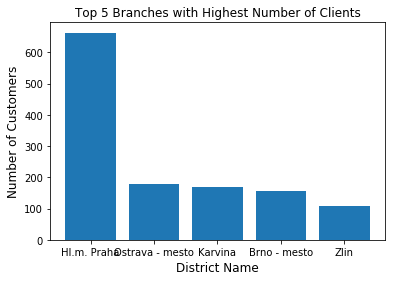

In [56]:
plt.bar(x,y)
plt.title('Top 5 Branches with Highest Number of Clients')
plt.xlabel('District Name', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)

The District with highest number of clients is Hl.m. Praha with a total of 663 clients

### ii. Which branches have shown a significant decline in the monthly number of accounts opened?

OK!! This question really got me thinking, i spent alot of time trying to figure out a way around in SQL it self and came up with the query below. But i was still having issues so i decided to move my data to Pandas and try the solution there. Just in case im leaving the sql query in comments below

In [57]:
dd2= pd.read_sql_query("""SELECT A.DISTRICT_NAME, COUNT(A.account_id) AS CNT,SUBSTR(A.date,3,2) AS Month
                            FROM (SELECT A1 AS DISTRICT_ID, A2 AS DISTRICT_NAME,date,account_id FROM account LEFT JOIN district ON account.district_id=district.A1) A 
                            GROUP BY A.DISTRICT_NAME, SUBSTR(A.date,3,2)
                           ORDER BY A.DISTRICT_NAME, SUBSTR(A.date,3,2) ASC""",conn)

In [58]:
display(dd2.head(20)) 

,DISTRICT_NAME,CNT,Month
0,Benesov,1,01
1,Benesov,5,02
2,Benesov,2,03
3,Benesov,3,04
4,Benesov,2,05
5,Benesov,7,06
6,Benesov,7,07
7,Benesov,5,09
8,Benesov,5,10
9,Benesov,2,11


In [249]:
dist = ''
dff = pd.DataFrame()
dist1 = list()
diff1 = list()
for index, row in dd2.iterrows():
    if dist != row['DISTRICT_NAME']:
        dist = row['DISTRICT_NAME']
        diff = 0
        cnt1 = 0
        cnt12 = 0
    
    if dist == row['DISTRICT_NAME']:
        
        if row['Month'] == '01':
            cnt1 =  row['CNT']
            
        if row['Month'] == '12':
            cnt12 =  row['CNT']
            
        if cnt1 > 0 and cnt12 > 0 :
            diff = int(cnt12) - int(cnt1)
            
            dist1.append(dist)
            diff1.append(diff)
dff['dist'] = pd.Series(dist1)
dff['diff'] = pd.Series(diff1)
        
    
    

    

,dist,diff
8,Ceske Budejovice,-2
10,Cheb,-2
11,Chomutov,-2
12,Chrudim,-5
13,Decin,-2


<BarContainer object of 31 artists>

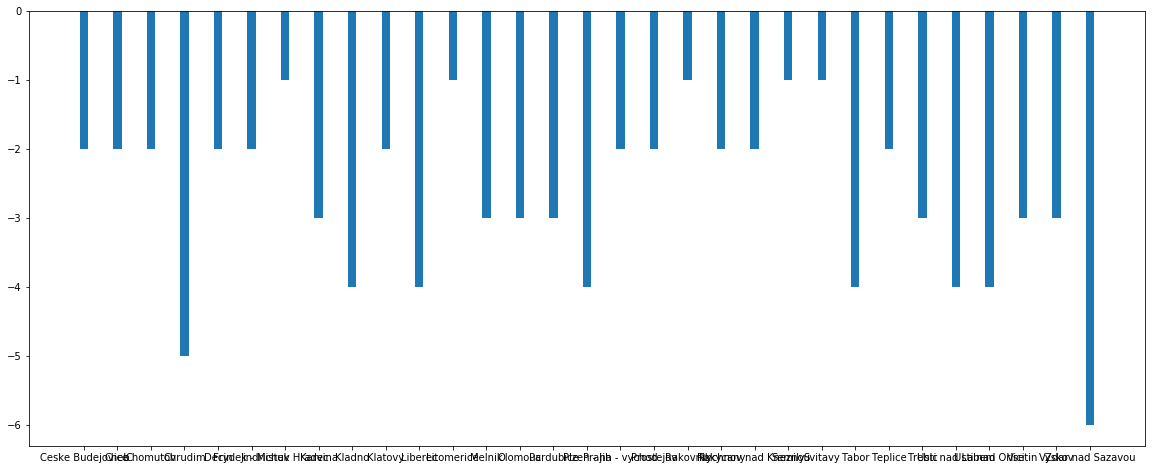

In [255]:
display(data.head())
data = dff[(dff['diff']<0)]
plt.figure(figsize=(20,8))
bar_width = 0.25
plt.bar(data['dist'],data['diff'],bar_width)

Umm ok so this was a bad idea, using sql i do have alot of freedom, but when it comes to datetimes, i chose SQLITE3 which doesnt support datetime formats.. I'm going to skip this question for now and try the others in Pandas Dataframes. Hopefully will have more luck

### iii. How many of our clients are men/women?

Since +50 is added to the months of date of births for females, Based on the months alone the Gender can be seggregated. I use Substring the extract the month,year and day from date column and along with client id i store it in a new dataframe

In [59]:
Clients= pd.read_sql_query("""SELECT A.Client,A.district_id, A.Y,A.M,A.D FROM (
                            SELECT client_id AS Client, district_id, SUBSTR(birth_number,1,2) AS Y,  SUBSTR(birth_number,3,2) AS M,SUBSTR(birth_number,5,2) AS D FROM client)A
                             """,conn)

In [60]:
display(Clients.head())

,Client,district_id,Y,M,D
0,1,18,70,62,13
1,2,1,45,02,04
2,3,1,40,60,09
3,4,5,56,12,01
4,5,5,60,57,03


Above we can clearly see that the months which have 50 added in them are in the high 50's and 60's. We can easily seggeregate the gender based on this in Pandas

In [61]:
print(Clients.shape)

(5369, 5)


In [62]:
Clients=pd.DataFrame(Clients)

In [63]:
display(Clients.head())

,Client,district_id,Y,M,D
0,1,18,70,62,13
1,2,1,45,02,04
2,3,1,40,60,09
3,4,5,56,12,01
4,5,5,60,57,03


Before i apply any arithematic functions, i need to convert the M column to Integer type, because i stored it as Text in SQLITE3

In [64]:
Clients.M = Clients.M.astype(int)

Here i define a simple function that will take in a row and check the Month if it's less then 12 it's for Male otherwise Female

In [65]:
def FindGender(row):
 if row['M'] > 12  :
      return 'Female'
 else:
        return 'Male'
Clients['Gender'] = Clients.apply (lambda row: FindGender(row),axis=1)

In [66]:
display(Clients.head(10))

,Client,district_id,Y,M,D,Gender
0,1,18,70,62,13,Female
1,2,1,45,2,04,Male
2,3,1,40,60,09,Female
3,4,5,56,12,01,Male
4,5,5,60,57,03,Female
5,6,12,19,9,22,Male
6,7,15,29,1,25,Male
7,8,51,38,52,21,Female
8,9,60,35,10,16,Male
9,10,57,43,5,01,Male


In [67]:
GenderofClients = Clients.groupby(by='Gender', as_index=False).agg({'Client': pd.Series.nunique})

In [68]:
display(GenderofClients)

,Gender,Client
0,Female,2645
1,Male,2724


So the Female clients are in total 2645 and as seen above the male clients are more in number with a total of 2724

Lets plot this to get a better understanding 

Text(0, 0.5, 'Number of Clients')

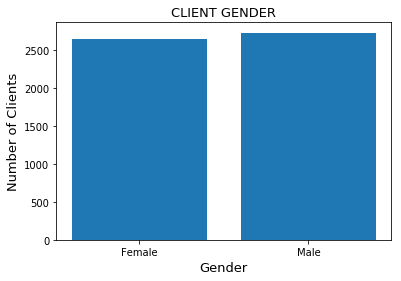

In [69]:
plt.bar(GenderofClients['Gender'],GenderofClients['Client'])
plt.title('CLIENT GENDER',fontsize=13)
plt.xlabel('Gender',fontsize=13)
plt.ylabel('Number of Clients',fontsize=13)


### iv. What is the breakdown of age groups for our clientele?

Since we have Date of birth given for each client in the clients table. We can calculate the date of birth by subtracting from current date

In [70]:
display(Clients.head(5))

,Client,district_id,Y,M,D,Gender
0,1,18,70,62,13,Female
1,2,1,45,2,04,Male
2,3,1,40,60,09,Female
3,4,5,56,12,01,Male
4,5,5,60,57,03,Female


First things first, i still need to subtract 50 from the females date of births. I can easily do this in pandas

In [71]:
Clients.M = Clients.M.astype(int)

I define a function below which will extract 50 from the months column if the value is above 12 and replace it in the original column

In [72]:
def Remove50(row):
 if row['M'] > 12  :
    return str(row['M'] - 50)
 else:
    return str(row['M'])
Clients['M'] = Clients.apply(lambda row: Remove50(row),axis=1)
Clients['M']=Clients['M'].apply(lambda x: '{0:0>2}'.format(x))#Once i removed 50 it was giving month in single digits which would
#cause a problem later when i convert to datetime formate
Clients= Clients.dropna()

In [73]:
Clients.Y = Clients.Y.astype(int)
Clients['Y']=Clients['Y'].apply(lambda x: x +1900)# I'm adding 1900, so that it doesnt get the wrong century,
#before it, the python datetime library was considering dates as far as 2070 :/..so this is more or less a requirement


Haha this is becoming quite a mess as i have to again convert all three columns to string before i join them..Should've created a function before hand


In [74]:
Clients.Y = Clients.Y.astype(str)
Clients.M = Clients.M.astype(str)
Clients.D = Clients.D.astype(str)

Now its time to join the columns together and make it into a date format

In [75]:
Clients['DOB'] = Clients[['Y','M','D']].apply(lambda x: ''.join(x), axis=1)

In [76]:
display(Clients.head(5))

,Client,district_id,Y,M,D,Gender,DOB
0,1,18,1970,12,13,Female,19701213
1,2,1,1945,02,04,Male,19450204
2,3,1,1940,10,09,Female,19401009
3,4,5,1956,12,01,Male,19561201
4,5,5,1960,07,03,Female,19600703


In [77]:
Clients["DOB"] = pd.to_datetime(Clients.DOB).dt.strftime('%d-%m-%Y')

In [78]:
#display(Clients.head(5))

I finally have the date of births of the clients in proper format Yayy.. Now it's time to calculate their age and seperate them into age groups


In [79]:
from datetime import datetime
from datetime import date

def calculate_age(born):
    born = datetime.strptime(born, "%d-%m-%Y").date()
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

Clients['Age'] = Clients["DOB"].apply(calculate_age)
display(Clients.head())

,Client,district_id,Y,M,D,Gender,DOB,Age
0,1,18,1970,12,13,Female,13-12-1970,48
1,2,1,1945,02,04,Male,04-02-1945,74
2,3,1,1940,10,09,Female,09-10-1940,78
3,4,5,1956,12,01,Male,01-12-1956,62
4,5,5,1960,07,03,Female,03-07-1960,58


Now that i calculated the client ages, its time to see the age distribution of the clients. For this i will use binning

In [80]:
bins = [ 18, 35, 65, np.inf]
lab = ['18-35', '35-65' ,'65+']
Clients['AgeGroup'] = pd.cut(Clients['Age'], bins, labels=lab)

In [81]:
display(Clients.head(5))

,Client,district_id,Y,M,D,Gender,DOB,Age,AgeGroup
0,1,18,1970,12,13,Female,13-12-1970,48,35-65
1,2,1,1945,02,04,Male,04-02-1945,74,65+
2,3,1,1940,10,09,Female,09-10-1940,78,65+
3,4,5,1956,12,01,Male,01-12-1956,62,35-65
4,5,5,1960,07,03,Female,03-07-1960,58,35-65


Since i have the date of birth and age, i will drop the columns Y,M,D 

In [82]:
Clients.drop(['Y','M','D'], axis=1, inplace=True)

In [83]:
display(Clients.head(5))

,Client,district_id,Gender,DOB,Age,AgeGroup
0,1,18,Female,13-12-1970,48,35-65
1,2,1,Male,04-02-1945,74,65+
2,3,1,Female,09-10-1940,78,65+
3,4,5,Male,01-12-1956,62,35-65
4,5,5,Female,03-07-1960,58,35-65


Text(0.5, 0, 'Age Range')

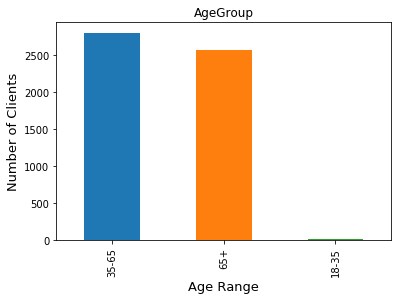

In [84]:
Clients['AgeGroup'].value_counts().plot(kind='bar', subplots=True)
plt.ylabel('Number of Clients',fontsize=13)
plt.xlabel('Age Range',fontsize=13)

We finally have the Age groups of our clients and their distribution.. as we can see that most of our clients are in the age range of 35-65 and others are above 65.. Although only a few hundered are between the ages of 18-35

In [85]:
Clients.isnull().sum()#Checking missing values for Clients Table

Client         0
district_id    0
Gender         0
DOB            0
Age            0
AgeGroup       0
dtype: int64

In [86]:
print(Clients.dtypes)

Client            int64
district_id       int64
Gender           object
DOB              object
Age               int64
AgeGroup       category
dtype: object


### Merging Data

#### Before i move any further.. I came to the conclusion that it's better to get all my data together

In [87]:
Branch = pd.read_sql_query("SELECT * FROM district", conn)

In [88]:
display(Branch.head())

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,12541,0.29,0.43,167,85677,99107
1,2,Benesov,central Bohemia,88884,80,26,6,2,5,46.7,8507,1.67,1.85,132,2159,2674
2,3,Beroun,central Bohemia,75232,55,26,4,1,5,41.7,8980,1.95,2.21,111,2824,2813
3,4,Kladno,central Bohemia,149893,63,29,6,2,6,67.4,9753,4.64,5.05,109,5244,5892
4,5,Kolin,central Bohemia,95616,65,30,4,1,6,51.4,9307,3.85,4.43,118,2616,3040


In [89]:
Branch.rename(columns={'A1':'district_id', 'A2':'district_name','A3':'Region','A11':'Average_Salary','A12':'Unemployment_rate95','A13':'Unemployment96'}, inplace=True)

Lets join the crime rate columns into one...too many attributes makes me nervous any ways :)
I'm also going to drop number of cities column since it makes no sense in the loan default prediction which i will perform later

Tried summing the values for A15 and A16..But something is up it seems like some rows have '?' in them for unknown values

In [90]:
def Removeunwanted(x, typ):
    if x == '?':
        return -1
    elif typ == 'float':
        return float(x)
    else:
        return int(x)
Branch['Unemployment_rate95'] = Branch['Unemployment_rate95'].apply(Removeunwanted, args=('float',))
Branch['A15'] = Branch['A15'].apply(Removeunwanted, args=('int',))

In [91]:
Branch['Crimesin95-96'] = Branch.apply(lambda x: x['A15'] + x['A16'], axis=1)

In [92]:
Branch.drop(['A15','A16','A9'], axis=1, inplace=True)

In [93]:
display(Branch.head(10))

,district_id,district_name,Region,A4,A5,A6,A7,A8,A10,Average_Salary,Unemployment_rate95,Unemployment96,A14,Crimesin95-96
0,1,Hl.m. Praha,Prague,1204953,0,0,0,1,100.0,12541,0.29,0.43,167,184784
1,2,Benesov,central Bohemia,88884,80,26,6,2,46.7,8507,1.67,1.85,132,4833
2,3,Beroun,central Bohemia,75232,55,26,4,1,41.7,8980,1.95,2.21,111,5637
3,4,Kladno,central Bohemia,149893,63,29,6,2,67.4,9753,4.64,5.05,109,11136
4,5,Kolin,central Bohemia,95616,65,30,4,1,51.4,9307,3.85,4.43,118,5656
5,6,Kutna Hora,central Bohemia,77963,60,23,4,2,51.5,8546,2.95,4.02,126,5760
6,7,Melnik,central Bohemia,94725,38,28,1,3,63.4,9920,2.26,2.87,130,9135
7,8,Mlada Boleslav,central Bohemia,112065,95,19,7,1,69.4,11277,1.25,1.44,127,10166
8,9,Nymburk,central Bohemia,81344,61,23,4,2,55.3,8899,3.39,3.97,149,5474
9,10,Praha - vychod,central Bohemia,92084,55,29,4,3,46.7,10124,0.56,0.54,141,8126


In [94]:
Branch.shape

(77, 14)

Merging Clients Table with Branch Table

In [95]:
ClientsBranches = pd.merge(Clients,Branch, how='left', on=['district_id'])

In [96]:
display(ClientsBranches.head())

,Client,district_id,Gender,DOB,Age,AgeGroup,district_name,Region,A4,A5,A6,A7,A8,A10,Average_Salary,Unemployment_rate95,Unemployment96,A14,Crimesin95-96
0,1,18,Female,13-12-1970,48,35-65,Pisek,south Bohemia,70699,60,13,2,1,65.3,8968,2.83,3.35,131,3650
1,2,1,Male,04-02-1945,74,65+,Hl.m. Praha,Prague,1204953,0,0,0,1,100.0,12541,0.29,0.43,167,184784
2,3,1,Female,09-10-1940,78,65+,Hl.m. Praha,Prague,1204953,0,0,0,1,100.0,12541,0.29,0.43,167,184784
3,4,5,Male,01-12-1956,62,35-65,Kolin,central Bohemia,95616,65,30,4,1,51.4,9307,3.85,4.43,118,5656
4,5,5,Female,03-07-1960,58,35-65,Kolin,central Bohemia,95616,65,30,4,1,51.4,9307,3.85,4.43,118,5656


In [97]:
ClientsBranches.shape

(5369, 19)

In [98]:
ClientsBranches.isna().sum()#Checking if there are any missing values

Client                 0
district_id            0
Gender                 0
DOB                    0
Age                    0
AgeGroup               0
district_name          0
Region                 0
A4                     0
A5                     0
A6                     0
A7                     0
A8                     0
A10                    0
Average_Salary         0
Unemployment_rate95    0
Unemployment96         0
A14                    0
Crimesin95-96          0
dtype: int64

##### Let's load the account table and pre-process the data

In [99]:
Account = pd.read_sql_query("SELECT * FROM account", conn)

In [100]:
Account["date"] = pd.to_datetime(Account.date).dt.strftime('%d-%m-%Y')#Converting Date to proper format

In [101]:
#Lets define a function that will convert all Gibberish to proper names according to the data dictionary
def ChangeFreqnames(x):
    if x == 'POPLATEK MESICNE':
        return 'MONTHLY'
    elif x == 'POPLATEK TYDNE':
        return 'WEEKLY'
    elif x == 'POPLATEK PO OBRATU':
        return 'TRANSACTION'   
Account['frequency'] = Account['frequency'].map(ChangeFreqnames)

In [102]:
display(Account.head())

,account_id,district_id,frequency,date
0,1,18,MONTHLY,24-03-1995
1,2,1,MONTHLY,26-02-1993
2,3,5,MONTHLY,07-07-1997
3,4,12,MONTHLY,21-02-1996
4,5,15,MONTHLY,30-05-1997


In [103]:
Account['frequency'].value_counts()

MONTHLY        4167
WEEKLY          240
TRANSACTION      93
Name: frequency, dtype: int64

In [104]:
Account.shape

(4500, 4)

In [105]:
display(Account.head())

,account_id,district_id,frequency,date
0,1,18,MONTHLY,24-03-1995
1,2,1,MONTHLY,26-02-1993
2,3,5,MONTHLY,07-07-1997
3,4,12,MONTHLY,21-02-1996
4,5,15,MONTHLY,30-05-1997


#### Now let's load in Card and Relation tables for pre processing

In [106]:
Card = pd.read_sql_query("SELECT * FROM card", conn)
Relation = pd.read_sql_query("SELECT * FROM relationship", conn)

In [107]:
display(Card.head())

,card_id,disp_id,type,issued
0,1,9,gold,981016 00:00:00
1,2,19,classic,980313 00:00:00
2,3,41,gold,950903 00:00:00
3,4,42,classic,981126 00:00:00
4,5,51,junior,950424 00:00:00


#### lets strip the time stamp from the issued date

In [108]:
Card.issued = Card.issued.astype(str)

In [109]:
Card['issued'] = pd.to_datetime(Card['issued'])

In [110]:
Card['issued'] = Card['issued'].dt.date


In [111]:
display(Card.head())

,card_id,disp_id,type,issued
0,1,9,gold,1998-10-16
1,2,19,classic,1998-03-13
2,3,41,gold,1995-09-03
3,4,42,classic,1998-11-26
4,5,51,junior,1995-04-24


#### Instead of keeping the issued date as a date, i decided to calculate the number of years instead when the card was issued. Too many dates in the data will be a pain to handle later anyways.

In [112]:
def calculate_years(born):
    born = datetime.strptime(born, "%Y-%m-%d").date()
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))
Card.issued = Card.issued.astype(str)
Card['issued']=Card["issued"].apply(calculate_years)

In [113]:
Card.rename(columns={'type':'Card_Type'}, inplace=True)
display(Card.head())

,card_id,disp_id,Card_Type,issued
0,1,9,gold,20
1,2,19,classic,20
2,3,41,gold,23
3,4,42,classic,20
4,5,51,junior,23


Let's rename the client id in Relation table

In [114]:
Relation.rename(columns={'client_id':'Client'}, inplace=True)

In [115]:
display(Relation.head())

,disp_id,Client,account_id,type
0,1,1,1,OWNER
1,2,2,2,OWNER
2,3,3,2,DISPONENT
3,4,4,3,OWNER
4,5,5,3,DISPONENT


In [116]:
Relation = pd.merge(Relation,Card, how='left', on=['disp_id'])# Merging card with Relation table

In [117]:
display(Relation.head(10))

,disp_id,Client,account_id,type,card_id,Card_Type,issued
0,1,1,1,OWNER,NaN,NaN,NaN
1,2,2,2,OWNER,NaN,NaN,NaN
2,3,3,2,DISPONENT,NaN,NaN,NaN
3,4,4,3,OWNER,NaN,NaN,NaN
4,5,5,3,DISPONENT,NaN,NaN,NaN
5,6,6,4,OWNER,NaN,NaN,NaN
6,7,7,5,OWNER,NaN,NaN,NaN
7,8,8,6,OWNER,NaN,NaN,NaN
8,9,9,7,OWNER,1.0,gold,20.0
9,10,10,8,OWNER,NaN,NaN,NaN


In [118]:
Relation.isna().sum()

disp_id          0
Client           0
account_id       0
type             0
card_id       4477
Card_Type     4477
issued        4477
dtype: int64

#### Well there are alot of clients who dont have a card issued to them.. These missing values will cause problems later on..Better i handle them now

In [119]:
Relation.shape

(5369, 7)

In [120]:
Relation.Card_Type.fillna('Notissued', inplace = True)# Changing the missing values to not issued category for card type

NameError: name 'Relation' is not defined

In [121]:
display(Relation.head(10))

,disp_id,Client,account_id,type,card_id,Card_Type,issued
0,1,1,1,OWNER,NaN,Notissued,NaN
1,2,2,2,OWNER,NaN,Notissued,NaN
2,3,3,2,DISPONENT,NaN,Notissued,NaN
3,4,4,3,OWNER,NaN,Notissued,NaN
4,5,5,3,DISPONENT,NaN,Notissued,NaN
5,6,6,4,OWNER,NaN,Notissued,NaN
6,7,7,5,OWNER,NaN,Notissued,NaN
7,8,8,6,OWNER,NaN,Notissued,NaN
8,9,9,7,OWNER,1.0,gold,20.0
9,10,10,8,OWNER,NaN,Notissued,NaN


In [122]:
Relation.issued.fillna('0', inplace = True)# Also Issued years to 0 for all those who have no card

In [123]:
display(Relation.head(10))

,disp_id,Client,account_id,type,card_id,Card_Type,issued
0,1,1,1,OWNER,NaN,Notissued,0
1,2,2,2,OWNER,NaN,Notissued,0
2,3,3,2,DISPONENT,NaN,Notissued,0
3,4,4,3,OWNER,NaN,Notissued,0
4,5,5,3,DISPONENT,NaN,Notissued,0
5,6,6,4,OWNER,NaN,Notissued,0
6,7,7,5,OWNER,NaN,Notissued,0
7,8,8,6,OWNER,NaN,Notissued,0
8,9,9,7,OWNER,1.0,gold,20
9,10,10,8,OWNER,NaN,Notissued,0


In [124]:
Relation.isna().sum() #Now missing values only remain in card_id which i drop later on before modeling anyways

disp_id          0
Client           0
account_id       0
type             0
card_id       4477
Card_Type        0
issued           0
dtype: int64

##### Let's merge the relation table (Final) with Accounts table

In [125]:
Account = pd.merge(Account,Relation, how='left', on=['account_id'])# Merging with the collective dataset

In [126]:
display(Account.head())

,account_id,district_id,frequency,date,disp_id,Client,type,card_id,Card_Type,issued
0,1,18,MONTHLY,24-03-1995,1,1,OWNER,NaN,Notissued,0
1,2,1,MONTHLY,26-02-1993,2,2,OWNER,NaN,Notissued,0
2,2,1,MONTHLY,26-02-1993,3,3,DISPONENT,NaN,Notissued,0
3,3,5,MONTHLY,07-07-1997,4,4,OWNER,NaN,Notissued,0
4,3,5,MONTHLY,07-07-1997,5,5,DISPONENT,NaN,Notissued,0


In [127]:
Account.shape

(5369, 10)

#### Loading Loan and transaction table and merging them with Account after pre processing

In [128]:
trans = pd.read_sql_query("SELECT * FROM trans", conn)
loan= pd.read_sql_query("SELECT * FROM loan", conn)

In [129]:
display(trans.head())

,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account
0,1,1,950324,PRIJEM,VKLAD,1000.0,1000.0,,,
1,5,1,950413,PRIJEM,PREVOD Z UCTU,3679.0,4679.0,,AB,41403269
2,6,1,950513,PRIJEM,PREVOD Z UCTU,3679.0,20977.2,,AB,41403269
3,7,1,950613,PRIJEM,PREVOD Z UCTU,3679.0,26835.2,,AB,41403269
4,8,1,950713,PRIJEM,PREVOD Z UCTU,3679.0,30414.8,,AB,41403269


In [130]:
trans.shape

(1056320, 10)

The transaction data is quite large, with multiple transactions for each account id, spanning over 1 decade or so... The thing is i dont need that many transaction. The best approach is to see whether the client has made recent transaction or not. I will only keep the last transaction for each account id and drop all other transactions

In [131]:
def Typeconvert(x):# First things first need to convert these unbearable tags to something understandable. For this i define 
    #Function that will replace the tags
    if x == 'PRIJEM':
        return 'Credit'
    elif x == 'VYDAJ':
        return 'Withdrawal'
    else:
        return np.NaN

In [132]:
trans['type'] = trans['type'].map(Typeconvert)

In [133]:
display(trans.head())

,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account
0,1,1,950324,Credit,VKLAD,1000.0,1000.0,,,
1,5,1,950413,Credit,PREVOD Z UCTU,3679.0,4679.0,,AB,41403269
2,6,1,950513,Credit,PREVOD Z UCTU,3679.0,20977.2,,AB,41403269
3,7,1,950613,Credit,PREVOD Z UCTU,3679.0,26835.2,,AB,41403269
4,8,1,950713,Credit,PREVOD Z UCTU,3679.0,30414.8,,AB,41403269


In [134]:
def Changetransoper(x):# Need to convert the Operations to something better understandable
    if x == 'VYBER KARTOU':
            return 'Credit Card Withdraw'
    elif x == 'VKLAD':
        return 'Credit in cash'
    elif x == 'PREVOD Z UCTU':
        return 'Collection from another bank'
    elif x == 'VYBER':
        return 'Withdrawal in Cash'
    elif x == 'PREVOD NA UCET':
        return 'Remittance to another bank'    
    else:
        return np.NaN
trans['operation'] = trans['operation'].map(Changetransoper)

In [135]:
display(trans.head())

,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account
0,1,1,950324,Credit,Credit in cash,1000.0,1000.0,,,
1,5,1,950413,Credit,Collection from another bank,3679.0,4679.0,,AB,41403269
2,6,1,950513,Credit,Collection from another bank,3679.0,20977.2,,AB,41403269
3,7,1,950613,Credit,Collection from another bank,3679.0,26835.2,,AB,41403269
4,8,1,950713,Credit,Collection from another bank,3679.0,30414.8,,AB,41403269


In [136]:
# Also need to convert K_symbol values to something more understandable
def Ksymbolconvertion(x):
    if x == 'POJISTNE':
        return 'Insurance payment'
    elif x == 'SLUZBY':
        return 'Payment for statement'
    elif x == 'UROK':
        return 'Interest credited'
    elif x == 'SANKC. UROK':
        return 'Sanction interest if negative balance'
    elif x == 'SIPO':
        return 'Household'
    elif x == 'DUCHOD':
        return 'Old-age pension'  
    elif x == 'UVER':
        return 'Loan payment'      
    else:
        return np.NaN
trans['k_symbol'] = trans['k_symbol'].map(Ksymbolconvertion)

In [137]:
display(trans.head())

,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account
0,1,1,950324,Credit,Credit in cash,1000.0,1000.0,NaN,,
1,5,1,950413,Credit,Collection from another bank,3679.0,4679.0,NaN,AB,41403269
2,6,1,950513,Credit,Collection from another bank,3679.0,20977.2,NaN,AB,41403269
3,7,1,950613,Credit,Collection from another bank,3679.0,26835.2,NaN,AB,41403269
4,8,1,950713,Credit,Collection from another bank,3679.0,30414.8,NaN,AB,41403269


In [138]:
trans.duplicated('account_id').sum()# As we can see that most ar duplicated values, as each account may have 100's of 
#transactions over the years.. So i will only keep the last transaction which will contain last account balance and credited 
#amount

1051820

In [139]:
trans.drop_duplicates(['account_id'],keep='last',inplace=True)# dropping all duplicates only keeping the last one


In [140]:
trans.sort_values('account_id',inplace=True)

I'm also going to drop the partner bank,date and partner account columns since it has mostly null values and again i dont need the transaction dates

In [141]:
trans.drop(['bank','account','date'], axis=1, inplace=True)

In [142]:
display(trans.head())

,trans_id,account_id,type,operation,amount,balance,k_symbol
919026,3530482,1,Credit,NaN,52.6,13466.5,Interest credited
919096,3530552,2,Credit,NaN,156.7,42628.1,Interest credited
919114,3530570,3,Credit,NaN,209.6,51096.1,Interest credited
919144,3530600,4,Credit,NaN,135.7,33720.7,Interest credited
919159,3530615,5,Credit,NaN,122.1,28088.3,Interest credited


In [143]:
trans.shape

(4500, 7)

I'm going to merge the transaction data to account data now.. But before that i need to check whether both tables have all account id's accounted for. For this i will use Numpy isin function to check both tables

In [144]:
CheckMissing = np.isin(Account['account_id'], trans['account_id'], invert=True).sum()
print('Number of Missing account id is{}'.format(CheckMissing))


Number of Missing account id is0


In [145]:
Account = pd.merge(Account,trans, how='left', on=['account_id'])# Merging trans with Account table

In [146]:
Account.shape

(5369, 16)

In [147]:
Account.isna().sum()

account_id        0
district_id       0
frequency         0
date              0
disp_id           0
Client            0
type_x            0
card_id        4477
Card_Type         0
issued            0
trans_id          0
type_y            0
operation      5259
amount            0
balance           0
k_symbol         57
dtype: int64

Now lets check the loan table and merge is aswell

In [148]:
display(loan.head())

,loan_id,account_id,date,amount,duration,payments,status
0,4959,2,940105,80952.0,24,3373,A
1,4961,19,960429,30276.0,12,2523,B
2,4962,25,971208,30276.0,12,2523,A
3,4967,37,981014,318480.0,60,5308,D
4,4968,38,980419,110736.0,48,2307,C


In [149]:
loan.shape

(682, 7)

It has only 682 observations which means not all accounts opted for loans

In [150]:
CheckMissing = np.isin(Account['account_id'], loan['account_id'], invert=True).sum()
print('Number of Missing account id is{}'.format(CheckMissing))

Number of Missing account id is4542


In [151]:
loan.isna().sum()

loan_id       0
account_id    0
date          0
amount        0
duration      0
payments      0
status        0
dtype: int64

Ok so i have no missing values in Loan table.. But the issue is that i only have 682 onservations for loans.. that too is divided into 4 categories of loan status. this means very less data to train loan default pediction model.. if i add the unkowns it will become biased.. But the thing is since i am going for a loan default prediction model. I only require those individuals who have taken loans. So i will keep the loan table as my main Table, others i dont need. First i will join all other tables to keep everything at hand. Lets handle the loan table merger for later

Lets merge the client and account table first.. Will merge the loan table later

In [152]:
ClientsBranches = pd.merge(ClientsBranches,Account, how='left',on='Client')# Merging Clients with Account table

In [153]:
ClientsBranches.shape

(5369, 34)

In [154]:
display(ClientsBranches.head())

,Client,district_id_x,Gender,DOB,Age,AgeGroup,district_name,Region,A4,A5,...,type_x,card_id,Card_Type,issued,trans_id,type_y,operation,amount,balance,k_symbol
0,1,18,Female,13-12-1970,48,35-65,Pisek,south Bohemia,70699,60,...,OWNER,NaN,Notissued,0,3530482,Credit,NaN,52.6,13466.5,Interest credited
1,2,1,Male,04-02-1945,74,65+,Hl.m. Praha,Prague,1204953,0,...,OWNER,NaN,Notissued,0,3530552,Credit,NaN,156.7,42628.1,Interest credited
2,3,1,Female,09-10-1940,78,65+,Hl.m. Praha,Prague,1204953,0,...,DISPONENT,NaN,Notissued,0,3530552,Credit,NaN,156.7,42628.1,Interest credited
3,4,5,Male,01-12-1956,62,35-65,Kolin,central Bohemia,95616,65,...,OWNER,NaN,Notissued,0,3530570,Credit,NaN,209.6,51096.1,Interest credited
4,5,5,Female,03-07-1960,58,35-65,Kolin,central Bohemia,95616,65,...,DISPONENT,NaN,Notissued,0,3530570,Credit,NaN,209.6,51096.1,Interest credited


### b. Credit Cards
### i. Which card types are popular among the various client categories (gender/age group/region)?


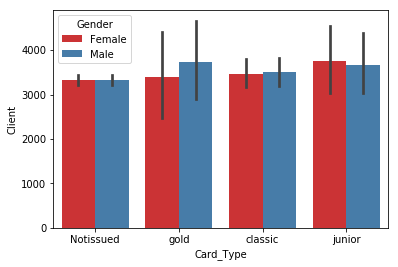

In [247]:
sns.barplot(x="Card_Type",y="Client",data=ClientsBranches,hue='Gender',palette='Set1')

So the Card Types that are popular among Males, and female clients do vary.. If we ignore those accounts that have no card issued to them. We can see that More Male clients have opted for Gold Type card.. While there are more female clients in the junior category.. Overall the classic category has similar number of males and females

#### Lets Plot Card Types with regards to Age group

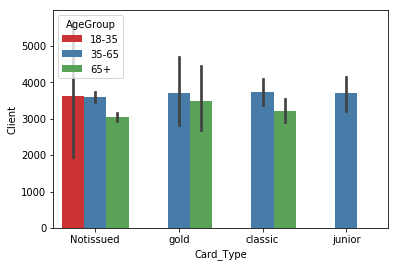

In [156]:
sns.barplot(x="Card_Type",y="Client",data=ClientsBranches,hue='AgeGroup',palette='Set1')

This is interesting.. Because it proved to me that i may have made a mistake...The data i think is quite old, whereas i calculated the age of clients with respect to current date.. Anyways, if we look at the data we can see that clients of ages 65+ prefer the Junior card type categories more, Whereas the same group of clients have opted for gold and classic type as well

#### Let's plot card type against region

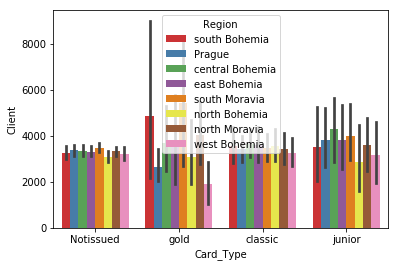

In [157]:
sns.barplot(x="Card_Type",y="Client",data=ClientsBranches,hue='Region',palette='Set1')

We get alot of information from this plot, as we can see that the Clients from South_Bohemia are greater in number for those who opted for Gold Card.. Rich people maybe.. Same can be seen for South Moravia..Maybe more enterpreneurs live in these two regions. Where as the other two categorues have more or less equal distribution

### ii. What is the trend of card issuance at the various branches?

In [158]:
clarity_color_table = pd.crosstab(index=ClientsBranches["district_name"], 
                          columns=ClientsBranches["issued"])

#Damn too many districts,quite a messy plot

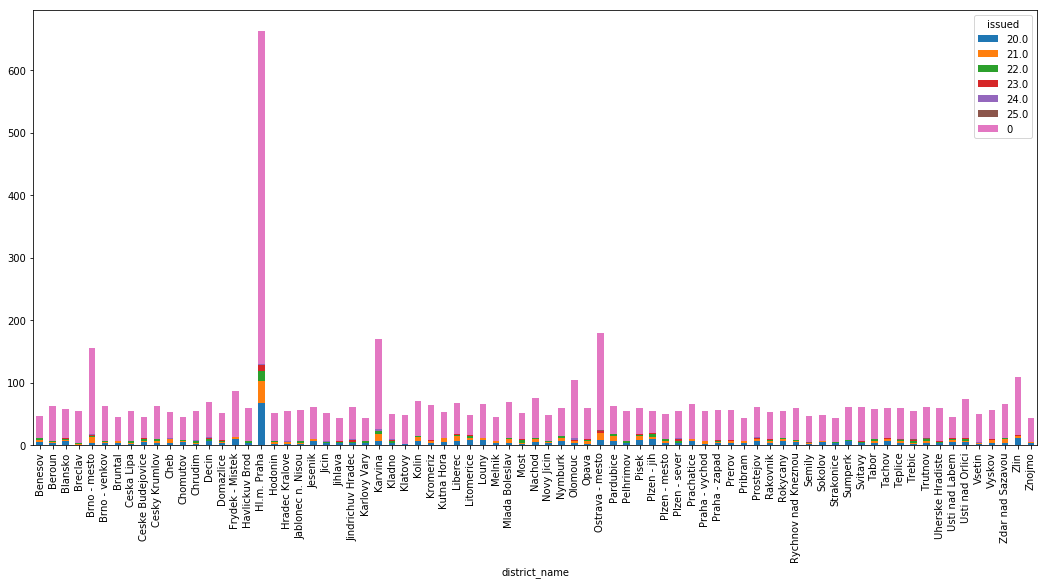

In [241]:
clarity_color_table.plot(kind="bar", 
                 figsize=(18,8),
                 stacked=True)

There's too many districts to plot in one graphs..another issue is Most people have not opted for card anyways

### Loans


##### Lets merge the loan table with the rest of the data

In [227]:
loan = pd.merge(loan,ClientsBranches, how='left', on=['account_id'])# Merging trans with Account table

In [228]:
display(loan.head())

,loan_id,account_id,date_x,Loan_Amount,Loan_duration,Monthly_payments,status,Client_x,district_id_x_x,Gender_x,...,type_x_y,card_id_y,Card_Type_y,issued_y,trans_id_y,type_y_y,operation_y,amount,balance_y,k_symbol_y
0,4959,2,940105,80952,24,3373,A,2,1,Male,...,OWNER,NaN,Notissued,0,3530552,Credit,NaN,156.7,42628.1,Interest credited
1,4959,2,940105,80952,24,3373,A,2,1,Male,...,DISPONENT,NaN,Notissued,0,3530552,Credit,NaN,156.7,42628.1,Interest credited
2,4959,2,940105,80952,24,3373,A,3,1,Female,...,OWNER,NaN,Notissued,0,3530552,Credit,NaN,156.7,42628.1,Interest credited
3,4959,2,940105,80952,24,3373,A,3,1,Female,...,DISPONENT,NaN,Notissued,0,3530552,Credit,NaN,156.7,42628.1,Interest credited
4,4961,19,960429,30276,12,2523,B,25,21,Female,...,OWNER,NaN,Notissued,0,3681216,Credit,NaN,32.9,10873.0,Interest credited


In [229]:
loan.duplicated().sum()

0

### i. What is the distribution of loan quantum given out by the bank?

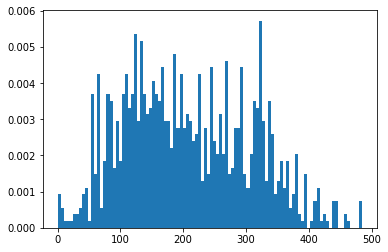

In [236]:
dy=plt.hist(loan['amount'], density=True, bins=100)

### ii. What is the relation between loan quantum and average salary?

In [164]:
loan['amount_x']= loan.amount_x.astype(int)

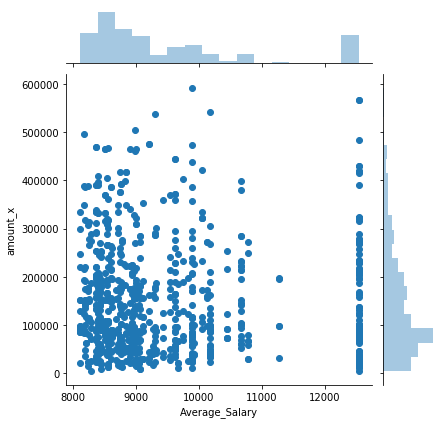

In [165]:
sns.jointplot(x='Average_Salary',y='amount_x',data=loan)

### iii. How many loans are currently in arrears?

Text(0.5, 0, 'Loan Status')

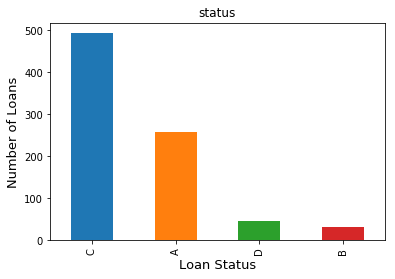

In [166]:
loan['status'].value_counts().plot(kind='bar', subplots=True)
plt.ylabel('Number of Loans',fontsize=13)
plt.xlabel('Loan Status',fontsize=13)

Since D represents the loans where the contract is running but the the clients loan are in arrears, we can see that about 50 loans are currently in arrears

### iv. What is the distribution of loan payments received by the bank?

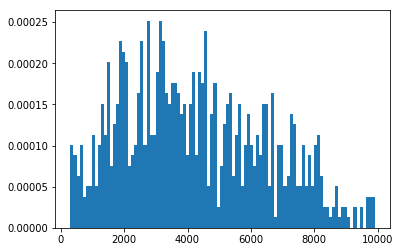

In [167]:
dx=plt.hist(loan['payments'], density=True, bins=100)

### d. Transactions
#### i. Which region has the lowest average number of transactions?

#### iv. What is the breakdown of the various transaction types?

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000022CA10C80F0>],
      dtype=object)

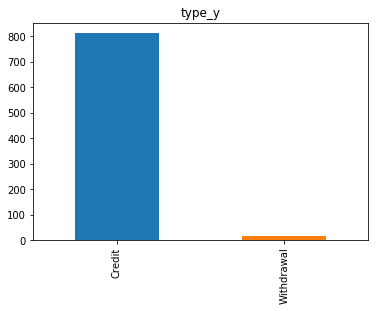

In [168]:
loan['type_y'].value_counts().plot(kind='bar', subplots=True)

Ok the project alot of time, i didnt have time to think for all the queries required.. But im moving forward towards the modelling part

### 3. Construct a Machine Learning model to address any ONE of the following use cases:
### 1. Default prediction for loans

Time to pre process the data further.. First im going to drop all id columns and some other that may be irrelevant for the model

In [169]:
loan.rename(columns={'amount_x':'Loan_Amount','payments':'Monthly_payments','duration':'Loan_duration','district_name':'District'}, inplace=True)

In [170]:
Final= pd.DataFrame(loan)#Make a new dataset for modeling

In [171]:
Final.drop(['loan_id','date_x','district_id_x','trans_id','account_id','operation','card_id','disp_id','district_id_y','DOB','date_y','District','frequency','k_symbol','AgeGroup','Client'], axis=1, inplace=True)

In [172]:
display(Final.head())

,Loan_Amount,Loan_duration,Monthly_payments,status,Gender,Age,Region,A4,A5,A6,...,Unemployment_rate95,Unemployment96,A14,Crimesin95-96,type_x,Card_Type,issued,type_y,amount_y,balance
0,80952,24,3373,A,Male,74,Prague,1204953,0,0,...,0.29,0.43,167,184784,OWNER,Notissued,0,Credit,156.7,42628.1
1,80952,24,3373,A,Female,78,Prague,1204953,0,0,...,0.29,0.43,167,184784,DISPONENT,Notissued,0,Credit,156.7,42628.1
2,30276,12,2523,B,Female,79,south Bohemia,103347,87,16,...,1.51,2.07,123,4653,OWNER,Notissued,0,Credit,32.9,10873.0
3,30276,12,2523,A,Male,57,north Moravia,228848,15,40,...,4.09,4.72,96,11510,OWNER,Notissued,0,Credit,197.5,30199.4
4,318480,60,5308,D,Male,66,south Bohemia,70646,94,14,...,2.65,3.64,120,3105,OWNER,Notissued,0,Credit,102.1,45904.5


Since i am going for binar classification problem.. My Target variable will be Status but i will go for binary classification so first i need to convert it into binary class

In [173]:
def Defaulter(x):# The clients whose contracts have finished without issue are non defaulters, or whose contracts are running
   #but they are paying their debts are also non defaulters others are considered defaulters
    if x == 'A':
        return 'Non_Defaulter'
    elif x == 'B':
        return 'Defaulter'
    elif x == 'C':
        return 'Non_Defaulter'
    elif x == 'D':
        return 'Defaulter'
    else:
        return np.NaN

In [174]:
Final['status'] = Final['status'].map(Defaulter)

In [175]:
display(Final.head())

,Loan_Amount,Loan_duration,Monthly_payments,status,Gender,Age,Region,A4,A5,A6,...,Unemployment_rate95,Unemployment96,A14,Crimesin95-96,type_x,Card_Type,issued,type_y,amount_y,balance
0,80952,24,3373,Non_Defaulter,Male,74,Prague,1204953,0,0,...,0.29,0.43,167,184784,OWNER,Notissued,0,Credit,156.7,42628.1
1,80952,24,3373,Non_Defaulter,Female,78,Prague,1204953,0,0,...,0.29,0.43,167,184784,DISPONENT,Notissued,0,Credit,156.7,42628.1
2,30276,12,2523,Defaulter,Female,79,south Bohemia,103347,87,16,...,1.51,2.07,123,4653,OWNER,Notissued,0,Credit,32.9,10873.0
3,30276,12,2523,Non_Defaulter,Male,57,north Moravia,228848,15,40,...,4.09,4.72,96,11510,OWNER,Notissued,0,Credit,197.5,30199.4
4,318480,60,5308,Defaulter,Male,66,south Bohemia,70646,94,14,...,2.65,3.64,120,3105,OWNER,Notissued,0,Credit,102.1,45904.5


In [176]:
Final['status'].value_counts()

Non_Defaulter    751
Defaulter         76
Name: status, dtype: int64

In [177]:
Final.dtypes

Loan_Amount              int32
Loan_duration            int64
Monthly_payments         int64
status                  object
Gender                  object
Age                      int64
Region                  object
A4                       int64
A5                       int64
A6                       int64
A7                       int64
A8                       int64
A10                    float64
Average_Salary           int64
Unemployment_rate95    float64
Unemployment96         float64
A14                      int64
Crimesin95-96            int64
type_x                  object
Card_Type               object
issued                  object
type_y                  object
amount_y               float64
balance                float64
dtype: object

Changing the object types to categories and converting them into numeric form

In [178]:
Final['status'] = Final['status'].astype('category')
Final['Gender'] = Final['Gender'].astype('category')
Final['Region'] = Final['Region'].astype('category')
Final['Card_Type'] = Final['Card_Type'].astype('category')
Final['type_x'] = Final['type_x'].astype('category')
Final['type_y'] = Final['type_y'].astype('category')
Final['issued'] = Final['issued'].astype('int')

In [179]:
Final['status']= Final['status'].cat.codes
Final['Gender'] = Final['Gender'].cat.codes
Final['Region'] = Final['Region'].cat.codes
Final['Card_Type'] = Final['Card_Type'].cat.codes
Final['type_x'] = Final['type_x'].cat.codes
Final['type_y'] = Final['type_y'].cat.codes

In [180]:
display(Final.head())

,Loan_Amount,Loan_duration,Monthly_payments,status,Gender,Age,Region,A4,A5,A6,...,Unemployment_rate95,Unemployment96,A14,Crimesin95-96,type_x,Card_Type,issued,type_y,amount_y,balance
0,80952,24,3373,1,1,74,0,1204953,0,0,...,0.29,0.43,167,184784,1,0,0,0,156.7,42628.1
1,80952,24,3373,1,0,78,0,1204953,0,0,...,0.29,0.43,167,184784,0,0,0,0,156.7,42628.1
2,30276,12,2523,0,0,79,5,103347,87,16,...,1.51,2.07,123,4653,1,0,0,0,32.9,10873.0
3,30276,12,2523,1,1,57,4,228848,15,40,...,4.09,4.72,96,11510,1,0,0,0,197.5,30199.4
4,318480,60,5308,0,1,66,5,70646,94,14,...,2.65,3.64,120,3105,1,0,0,0,102.1,45904.5


In [181]:
v= Final.dtypes

### Correlation Matrix

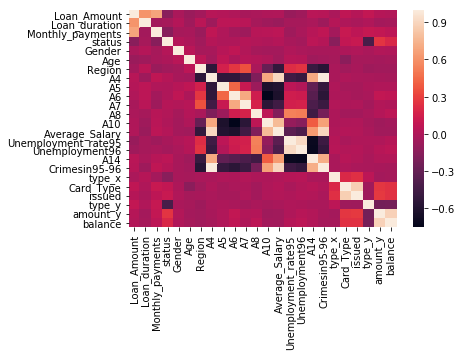

In [182]:
corr = Final.corr()
# Correlation Plot for the independent variables
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

#### Getting Data ready for modeling

In [183]:
X= Final.drop(['status'],axis=1)
Y= pd.DataFrame(Final['status'])
display(X.head())
display(Y.head())

,Loan_Amount,Loan_duration,Monthly_payments,Gender,Age,Region,A4,A5,A6,A7,...,Unemployment_rate95,Unemployment96,A14,Crimesin95-96,type_x,Card_Type,issued,type_y,amount_y,balance
0,80952,24,3373,1,74,0,1204953,0,0,0,...,0.29,0.43,167,184784,1,0,0,0,156.7,42628.1
1,80952,24,3373,0,78,0,1204953,0,0,0,...,0.29,0.43,167,184784,0,0,0,0,156.7,42628.1
2,30276,12,2523,0,79,5,103347,87,16,7,...,1.51,2.07,123,4653,1,0,0,0,32.9,10873.0
3,30276,12,2523,1,57,4,228848,15,40,18,...,4.09,4.72,96,11510,1,0,0,0,197.5,30199.4
4,318480,60,5308,1,66,5,70646,94,14,3,...,2.65,3.64,120,3105,1,0,0,0,102.1,45904.5


,status
0,1
1,1
2,0
3,1
4,0


In [184]:
Y['status'].value_counts()

1    751
0     76
Name: status, dtype: int64

### Feature Selection
##### Due to shortage of time im not using any complex methods for Feature selection.. Simply using Extra trees classifier from sklearn library

In [185]:
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
# fit an Extra Trees model to the data
model = ExtraTreesClassifier()
model.fit(X, Y.values.ravel())
# display the relative importance of each attribute
display(model.feature_importances_)

C:\Users\uzair\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


array([0.08390055, 0.05399768, 0.07227961, 0.02899126, 0.06986248,
       0.0298344 , 0.02673031, 0.03855175, 0.03372896, 0.01765037,
       0.01652956, 0.02382041, 0.02597032, 0.02256672, 0.0206748 ,
       0.02443902, 0.02880405, 0.01992671, 0.0052626 , 0.01737   ,
       0.10873966, 0.12855757, 0.1018112 ])

 For feature selection i set a manual Threshold for feature importance to 0.02, Anything below it will be discarded and anything above i will keep for my model development.. So far the output show that type_x, Card_Type,A4,A6,A7,A8,A10,Unemployment96,Region,Crimein95-96.. So i will discard these 

In [186]:
X= X.drop(['type_x', 'Card_Type','A4','A6','A7','A8','A10','Unemployment_rate95','Region','Crimesin95-96'],axis=1)

In [187]:
display(X.head())

,Loan_Amount,Loan_duration,Monthly_payments,Gender,Age,A5,Average_Salary,Unemployment96,A14,issued,type_y,amount_y,balance
0,80952,24,3373,1,74,0,12541,0.43,167,0,0,156.7,42628.1
1,80952,24,3373,0,78,0,12541,0.43,167,0,0,156.7,42628.1
2,30276,12,2523,0,79,87,9104,2.07,123,0,0,32.9,10873.0
3,30276,12,2523,1,57,15,9893,4.72,96,0,0,197.5,30199.4
4,318480,60,5308,1,66,94,8547,3.64,120,0,0,102.1,45904.5


### Modelling

In [188]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier

#### Defiining a function for Model Training and testing which will print out classification report, Confusion Matrix and Accuracy

Also im using Cross Validation for checking model Performance

In [189]:
""""Defining A function for model evaulatin"""
def model1(mod, model_name, x_train, y_train, x_test, y_test):
    mod.fit(x_train, y_train)
    print(model_name)
    acc = cross_val_score(mod, x_train, y_train, scoring = "accuracy", cv = 5)
    predictions = cross_val_predict(mod, x_train, y_train, cv = 5)
    print("Accuracy:", round(acc.mean(),3))
    cm = confusion_matrix(predictions, y_train)
    print("Confusion Matrix:  \n", cm)
    print("                    Classification Report \n",classification_report(predictions, y_train))

#### Splitting the data into train and test set

In [190]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, Y.values.ravel(), test_size=0.2, random_state=0) #80/20 split

### Logistic Regression

In [191]:
LR=LogisticRegression(penalty='l2', max_iter=1000)

In [192]:
model1(LR,"Logistic Regression",x_train,y_train,x_test,y_test)

Logistic Regression
Accuracy: 0.92
Confusion Matrix:  
 [[  5   0]
 [ 53 603]]
                    Classification Report 
              precision    recall  f1-score   support

          0       0.09      1.00      0.16         5
          1       1.00      0.92      0.96       656

avg / total       0.99      0.92      0.95       661



Our Model is pretty neat As it attained an accuracy of 92% which is pretty good i believe for the test run

### Random Forest

In [193]:
RF = RandomForestClassifier()

In [194]:
model1(RF,"Random Forest",x_train,y_train,x_test,y_test)

Random Forest
Accuracy: 0.923
Confusion Matrix:  
 [[ 18   6]
 [ 40 597]]
                    Classification Report 
              precision    recall  f1-score   support

          0       0.31      0.75      0.44        24
          1       0.99      0.94      0.96       637

avg / total       0.97      0.93      0.94       661



Random Forest Performed even better ad attained an accuracy of 92.9 %. This is getting exciting